# CANCER DU SEIN : MACHINE LEARNING

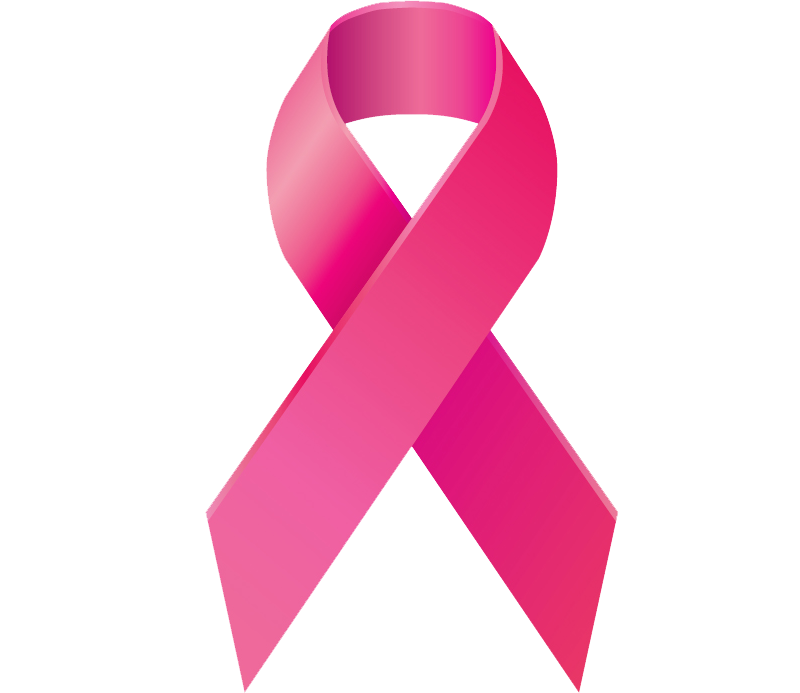

# https://www.kaggle.com/yasserh/breast-cancer-dataset

# PROBLEMATIQUE :
Il s’agit d’un ensemble de données de patientes atteintes d’un cancer du sein avec une tumeur maligne et bénigne.
Une tumeur maligne est un amas de cellules cancéreuses. Une tumeur bénigne n'est pas un cancer, contrairement à une tumeur maligne.

In [85]:
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [92]:
df = pd.read_csv(cwd+"/breast-cancer.csv", index_col = "id")
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df["diagnosis"] = df["diagnosis"].astype('str')

In [5]:
df["diagnosis"].unique()
# TUMEUR MALIGNE AVEC CELLULES CANCEREUSES, TUMEUR BENIGNE SANS CELLULES CANCEREUSES

array(['M', 'B'], dtype=object)

In [6]:
def check_train(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_train(df)

##################### Shape #####################
(569, 31)
##################### Types #####################
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_wors

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [9]:
X = df.drop(["diagnosis"], axis=1)
X
y = df["diagnosis"]
y

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

In [11]:
pd.DataFrame(y_test)

,diagnosis
id,
91858,B
924342,B
8812844,B
859575,M
86408,B
...,...
90250,B
917092,B
9012568,B


In [12]:
# Vérifier la répartition sur y_train
pd.Series(y_train).value_counts(normalize=True)

B    0.627968
M    0.372032
Name: diagnosis, dtype: float64

In [13]:
# Vérifier la répartition sur y_test
pd.Series(y_test).value_counts(normalize=True)

B    0.626316
M    0.373684
Name: diagnosis, dtype: float64

In [14]:
print(X_train.shape) ; print(y_train.shape) ; print(X_test.shape) ; print(y_test.shape)

(379, 30)
(379,)
(190, 30)
(190,)


# KMEANS

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
#km
km.fit(X)

KMeans(n_clusters=2, random_state=42)

In [16]:
km.labels_.shape
km.cluster_centers_
km.inertia_
km.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [17]:
y_test

id
91858      B
924342     B
8812844    B
859575     M
86408      B
          ..
90250      B
917092     B
9012568    B
924632     B
879523     M
Name: diagnosis, Length: 190, dtype: object

In [18]:
y_pred = km.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [19]:
df['cluster'] = km.labels_
df['cluster'] = df['cluster'].replace({ 0: "B", 1 : "M"})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,B
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,B


In [20]:
pd.crosstab(df['diagnosis'], df['cluster'])

cluster,B,M
diagnosis,,
B,356,1
M,82,130


# KNN

In [21]:
# import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [23]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [24]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
911320501,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863
921644,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
8910506,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.12560,0.18080,0.19920,0.05780,0.3604,0.07062
901028,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113
923780,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854941,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
905686,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
9112594,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291


In [25]:
y_pred = knn1.predict(X_test)
y_pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B

In [26]:
y_test

id
91858      B
924342     B
8812844    B
859575     M
86408      B
          ..
90250      B
917092     B
9012568    B
924632     B
879523     M
Name: diagnosis, Length: 190, dtype: object

In [27]:
acc = knn1.score(X_test, y_test)
acc

0.9105263157894737

In [28]:
# Méthode détaillée pr retrouver l'`accuary`
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# pd.DataFrame(conf_mat, columns=iris.target_names, index=iris.target_names)

array([[116,   3],
       [ 14,  57]], dtype=int64)

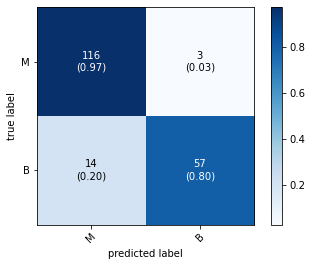

In [29]:
from mlxtend.plotting import plot_confusion_matrix

class_names = y.unique()

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [30]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.9105263157894737

In [31]:
err = 1 - acc
err * 100 # err = 0.08

8.947368421052627

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9105263157894737

In [33]:
# Boucle à améliorer => k range de nb impair (pr les besoins du vote à majorité)
err_default = 8
neighbors = range(2, 101)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(X_train, y_train)
	err = round((1.0 - knn.score(X_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 7.895

Improvement of 0.10500000000000043%




Results : knn = 3 => err_test = 6.842

Improvement of 1.1580000000000004%




Results : knn = 4 => err_test = 7.368

Improvement of 0.6319999999999997%




Results : knn = 5 => err_test = 6.842

Improvement of 1.1580000000000004%




Results : knn = 6 => err_test = 8.421

Improvement of -0.4209999999999994%




Results : knn = 7 => err_test = 6.842

Improvement of 1.1580000000000004%




Results : knn = 8 => err_test = 7.368

Improvement of 0.6319999999999997%




Results : knn = 9 => err_test = 5.789

Improvement of 2.2110000000000003%




Results : knn = 10 => err_test = 7.368

Improvement of 0.6319999999999997%




Results : knn = 11 => err_test = 5.789

Improvement of 2.2110000000000003%




Results : knn = 12 => err_test = 7.368

Improvement of 0.6319999999999997%




Results : knn = 13 => err_test = 5.263

Improvement of 2.737%




Results : knn = 14 => err_test = 6.842

Improvement of 1.158000000000

Text(0.5, 0, 'neighbors')

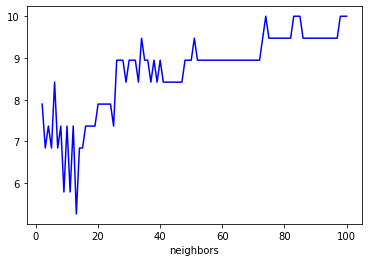

In [34]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

In [35]:
df = pd.DataFrame({"neighbors" : neighbors, "errors" : errors})
# df = df.sort_values('errors', ascending=True)
df = df.sort_values(['errors', 'neighbors'], ascending=[True, False])
df.head(15)

,neighbors,errors
11,13,5.263
9,11,5.789
7,9,5.789
13,15,6.842
12,14,6.842
5,7,6.842
3,5,6.842
1,3,6.842
23,25,7.368
17,19,7.368


In [36]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
91858,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.500,27.98,88.52,552.3,0.13490,0.18540,0.13660,0.10100,0.2478,0.07757
924342,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
8812844,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,...,11.170,22.84,71.94,375.6,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797
859575,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
86408,12.630,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90250,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
917092,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,...,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
9012568,15.190,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.200,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766


In [93]:
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)


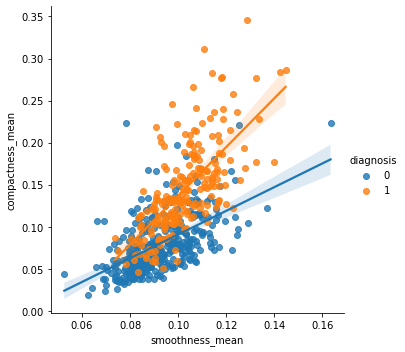

In [95]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
           data = df, hue = 'diagnosis')

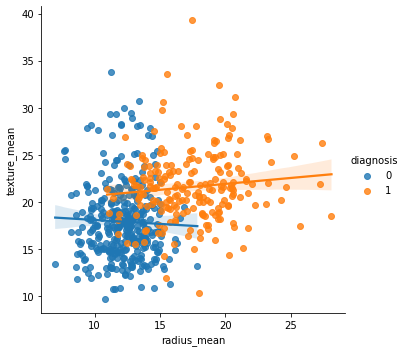

In [96]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

# DECISIONTREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [38]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
tree.classes_
print(tree.max_depth)
tree.criterion

y_pred = tree.predict(X_test)
y_pred

None


array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B

In [40]:
y_pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B

In [41]:
y_test.values

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B

In [42]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.9263157894736842

In [43]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
score = tree.score(X_test, y_test)
score

0.9263157894736842

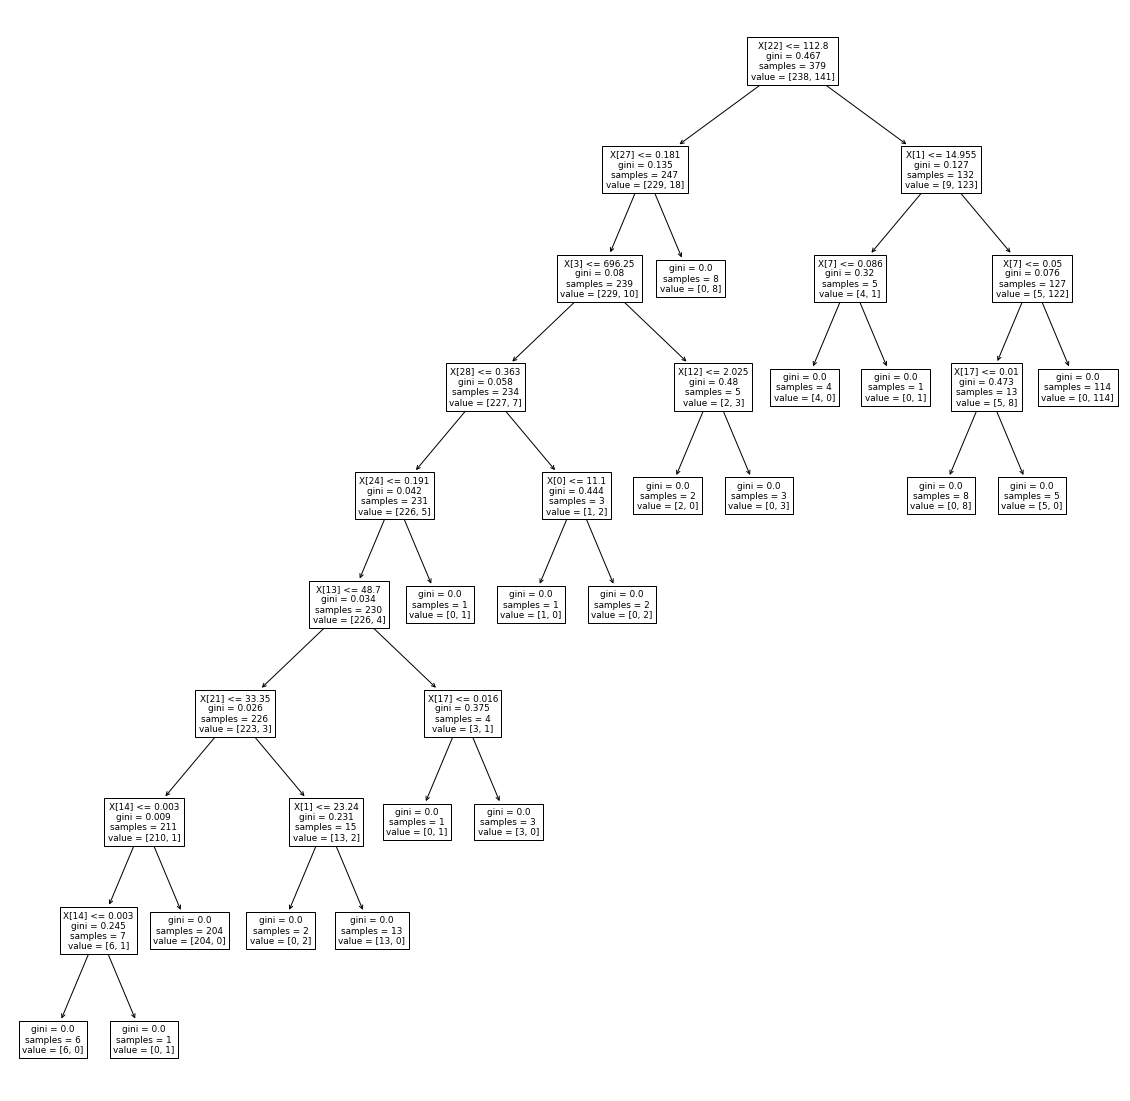

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_breast = plot_tree(tree)
#L'arbre est trop grand (illisible) => Overfittng

In [45]:
from sklearn.tree import export_text

scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [46]:
scores

[0.9052631578947369,
 0.9105263157894737,
 0.9105263157894737,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9263157894736842]

In [47]:
X_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
911320501,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
921644,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.1376,0.1611,0.10950,0.2722,0.06956


In [48]:
# Algo optimal pr les besoins du plot de l'arbre
# tree=DecisionTreeClassifier(max_depth=3, random_state=42)
# tree.fit(X_train, y_train)
# plt.figure(figsize = (10, 10))
# tree_breast= plot_tree(tree)

In [49]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- perimeter_worst <= 112.80
|   |--- concave points_worst <= 0.18
|   |   |--- area_mean <= 696.25
|   |   |   |--- symmetry_worst <= 0.36
|   |   |   |   |--- smoothness_worst <= 0.19
|   |   |   |   |   |--- area_se <= 48.70
|   |   |   |   |   |   |--- texture_worst <= 33.35
|   |   |   |   |   |   |   |--- smoothness_se <= 0.00
|   |   |   |   |   |   |   |   |--- smoothness_se <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |   |   |--- smoothness_se >  0.00
|   |   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- smoothness_se >  0.00
|   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |--- texture_worst >  33.35
|   |   |   |   |   |   |   |--- texture_mean <= 23.24
|   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- texture_mean >  23.24
|   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- area_se >  48.70
|   |   |   |   |   |   |--- concave points_se <

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

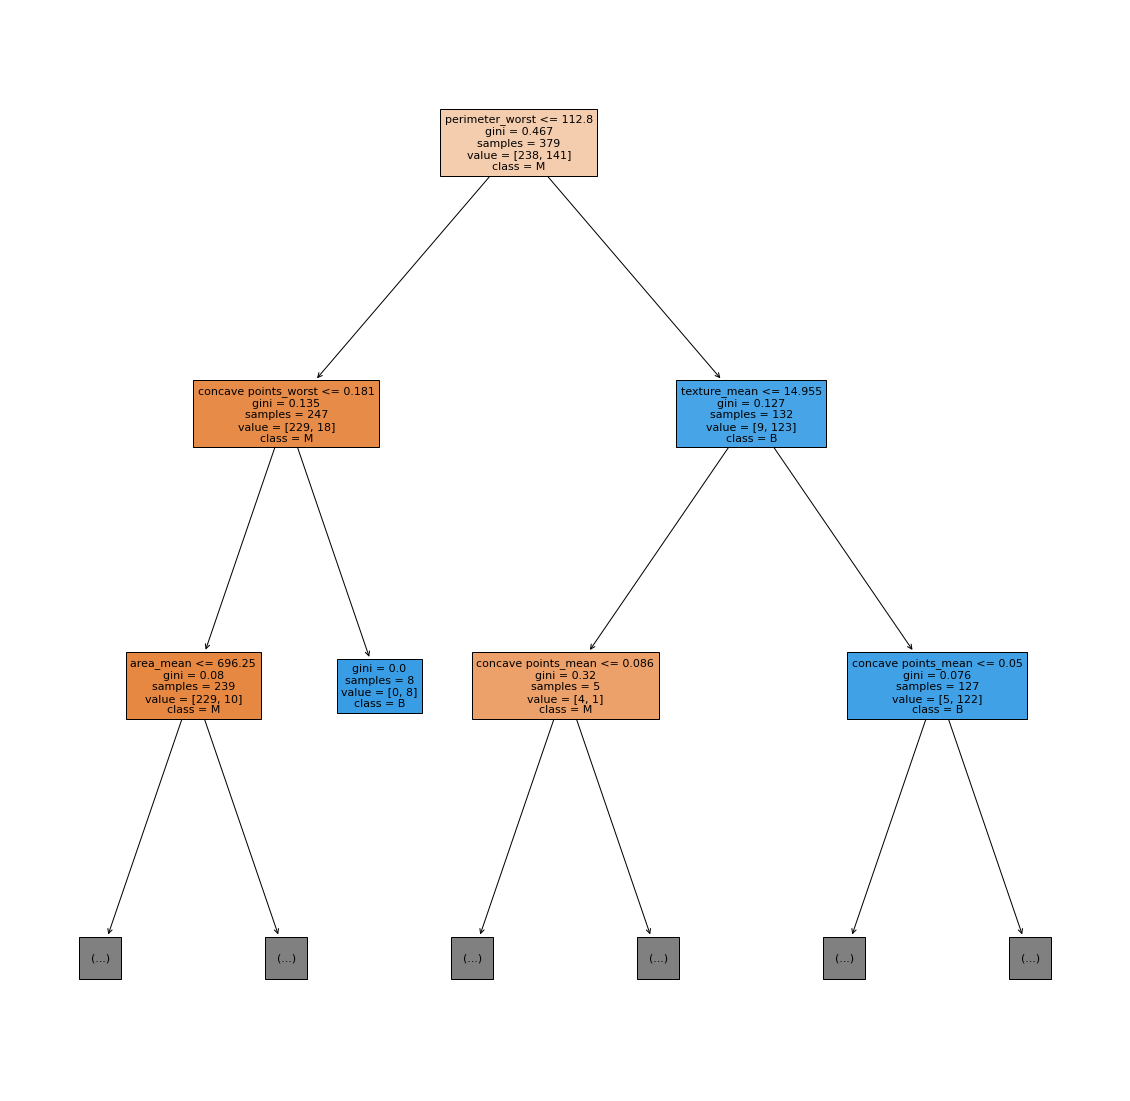

In [51]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (20, 20))
tree_plot=tree.plot_tree(clf, feature_names=X.columns, max_depth=2, filled=True, class_names=y.unique().astype(str))

# RANDOM FOREST 

In [52]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
# rf.criterion
# print(rf.max_depth)
rf.n_estimators # 100 decision tree since version 0.22
rf.predict

<bound method ForestClassifier.predict of RandomForestClassifier(n_jobs=-1, random_state=42)>

In [55]:
y_pred = rf.predict(X_test)
y_pred

array(['B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B

In [56]:
y_test

id
91858      B
924342     B
8812844    B
859575     M
86408      B
          ..
90250      B
917092     B
9012568    B
924632     B
879523     M
Name: diagnosis, Length: 190, dtype: object

In [57]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat
pd.DataFrame(conf_mat) #, columns=iris.target_names, index=iris.target_names)

,0,1
0,119,0
1,8,63


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

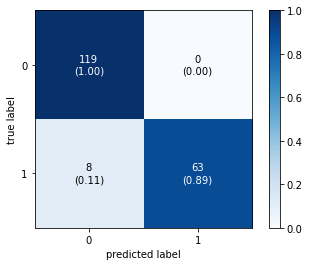

In [58]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)
# class_names=iris.target_names

In [59]:
# metrics.accuracy_score(y_test, y_pred)
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

4.210526315789476

In [60]:
(1 - rf.score(X_test, y_test)) * 100

4.210526315789476

# Tuning : n_estimators, max_features, max_depth, ... `

In [61]:
# max_depths ? 
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [62]:
errors = []
err_default = 4.21
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 8.421

Improvement of -4.210999999999999%




Results : max_depth = 2 => err_test = 5.789

Improvement of -1.5789999999999997%




Results : max_depth = 3 => err_test = 4.737

Improvement of -0.5270000000000001%




Results : max_depth = 4 => err_test = 5.263

Improvement of -1.053%




Results : max_depth = 5 => err_test = 3.684

Improvement of 0.5259999999999998%




Results : max_depth = 6 => err_test = 4.211

Improvement of -0.001000000000000334%




Results : max_depth = 7 => err_test = 4.211

Improvement of -0.001000000000000334%




Results : max_depth = 8 => err_test = 3.158

Improvement of 1.052%




Results : max_depth = 9 => err_test = 3.158

Improvement of 1.052%




Results : max_depth = 10 => err_test = 3.684

Improvement of 0.5259999999999998%




Results : max_depth = None => err_test = 4.211

Improvement of -0.001000000000000334%




Text(0.5, 0, 'max_depths')

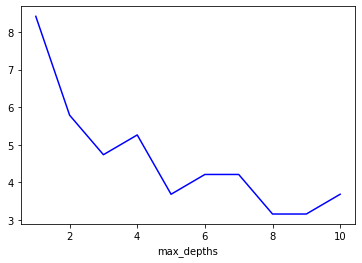

In [63]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

## n_estimators (nb d'arbre) 

In [64]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [65]:
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 6.842


Improvement of -2.63%.


Results : n_estimators = 6 => err_test = 4.737


Improvement of -0.53%.


Results : n_estimators = 11 => err_test = 3.684


Improvement of 0.53%.


Results : n_estimators = 16 => err_test = 3.684


Improvement of 0.53%.


Results : n_estimators = 21 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 26 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 31 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 36 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 41 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 46 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 51 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 56 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 61 => err_test = 3.158


Improvement of 1.05%.


Results : n_estimators = 66 => err_t

Text(0, 0.5, 'err_test')

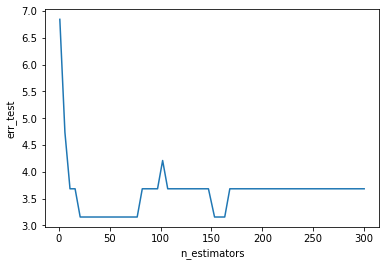

In [66]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [67]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anacond



Results : n_estimators = 1 => acc_oob = 74.142, err_test = 10.0, err_train = 3.166




Results : n_estimators = 6 => acc_oob = 90.237, err_test = 6.316, err_train = 1.319




Results : n_estimators = 11 => acc_oob = 94.195, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(




Results : n_estimators = 16 => acc_oob = 93.14, err_test = 4.211, err_train = 0.528




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 21 => acc_oob = 95.778, err_test = 4.211, err_train = 0.264




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 26 => acc_oob = 95.251, err_test = 2.632, err_train = 0.264




Results : n_estimators = 31 => acc_oob = 96.042, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 36 => acc_oob = 95.515, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 41 => acc_oob = 94.987, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 46 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 51 => acc_oob = 96.042, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 56 => acc_oob = 96.042, err_test = 2.632, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 61 => acc_oob = 96.306, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 66 => acc_oob = 95.251, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 71 => acc_oob = 94.987, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 77 => acc_oob = 96.042, err_test = 5.263, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 82 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 87 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 92 => acc_oob = 94.723, err_test = 4.737, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 97 => acc_oob = 95.251, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 102 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 107 => acc_oob = 94.987, err_test = 4.737, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 112 => acc_oob = 94.987, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 117 => acc_oob = 96.042, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 122 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 127 => acc_oob = 96.306, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 132 => acc_oob = 94.723, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 137 => acc_oob = 95.515, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 142 => acc_oob = 95.515, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 147 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 153 => acc_oob = 96.042, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 158 => acc_oob = 95.515, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 163 => acc_oob = 95.778, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 168 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 173 => acc_oob = 95.515, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 178 => acc_oob = 95.515, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 183 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 188 => acc_oob = 95.778, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 193 => acc_oob = 95.251, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 198 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 203 => acc_oob = 95.515, err_test = 3.158, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 208 => acc_oob = 96.042, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 213 => acc_oob = 94.723, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 218 => acc_oob = 95.251, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 223 => acc_oob = 95.515, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 229 => acc_oob = 94.987, err_test = 2.632, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 234 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 239 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 244 => acc_oob = 95.251, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 249 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 254 => acc_oob = 96.042, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 259 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 264 => acc_oob = 96.306, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 269 => acc_oob = 95.515, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 274 => acc_oob = 95.515, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 279 => acc_oob = 95.251, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 284 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 289 => acc_oob = 95.515, err_test = 4.211, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 294 => acc_oob = 95.778, err_test = 3.684, err_train = 0.0




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 300 => acc_oob = 95.251, err_test = 3.684, err_train = 0.0




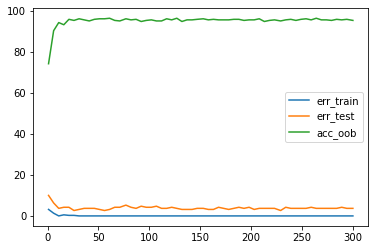

In [68]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [69]:
1-rf.oob_score_

0.0474934036939314

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param = { "max_features" : list(range(2, 5, 1)) }
param

{'max_features': [2, 3, 4]}

In [72]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 0),
			        param, cv=5, n_jobs = -1)
rf
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=0),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4]})

In [73]:
pd.DataFrame(rf.cv_results_)[['param_max_features', 'mean_test_score', 'params']]
# rf.best_estimator_

,param_max_features,mean_test_score,params
0,2,0.955053,{'max_features': 2}
1,3,0.957684,{'max_features': 3}
2,4,0.962947,{'max_features': 4}


In [74]:
1-rf.score(X_test, y_test)

0.03157894736842104

In [75]:
# Créer 1df qui contient les features et leur importance
feature = [column for column in X.columns]
importance = np.round(rf.best_estimator_.feature_importances_ * 100, 2)
feature_importance = pd.DataFrame({'feature' : feature, 'importance' : importance})
feature_importance
# feature

,feature,importance
0,radius_mean,4.16
1,texture_mean,1.71
2,perimeter_mean,5.52
3,area_mean,3.33
4,smoothness_mean,0.94
5,compactness_mean,1.84
6,concavity_mean,5.22
7,concave points_mean,11.01
8,symmetry_mean,0.53
9,fractal_dimension_mean,0.40


In [76]:
feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : X.columns, 'importance' : feature_importances}).sort_values('importance', ascending=False)

,feature,importance
22,perimeter_worst,0.125148
20,radius_worst,0.118036
7,concave points_mean,0.110130
27,concave points_worst,0.099862
23,area_worst,0.088239
2,perimeter_mean,0.055221
6,concavity_mean,0.052178
0,radius_mean,0.041588
13,area_se,0.035991
26,concavity_worst,0.034374


In [77]:
rf.best_estimator_.feature_importances_

array([0.04158847, 0.0171077 , 0.05522065, 0.03329653, 0.00942025,
       0.01841311, 0.05217775, 0.11013042, 0.00529004, 0.0040492 ,
       0.0215226 , 0.00460716, 0.02266685, 0.03599092, 0.00483515,
       0.00538446, 0.00585896, 0.00681997, 0.0050154 , 0.00767729,
       0.1180359 , 0.0150735 , 0.12514847, 0.08823915, 0.0107741 ,
       0.01484804, 0.03437352, 0.09986227, 0.01966956, 0.00690264])

# NAIVE BAYES ALGORITHM

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 190 points : 11


# P(A/B) = P(B/A).P(A) / P(B)

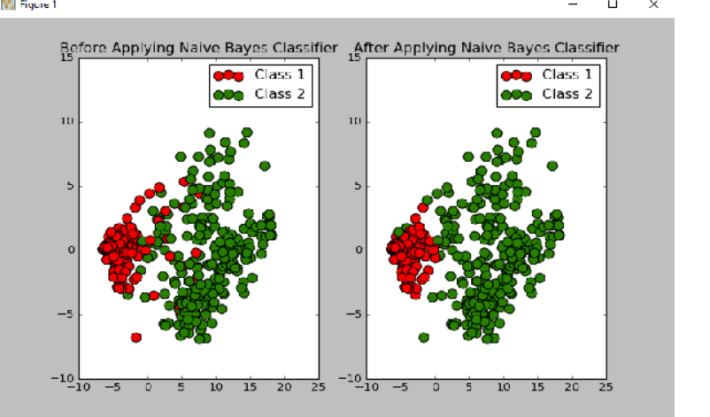

# SVM ALGORITHM

In [80]:
from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9577836411609498
0.9578947368421052


In [81]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[117   3]
 [  5  65]]


In [82]:
# Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8891820580474934
0.9421052631578948


In [83]:
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)
  
# prediction = svc_model.predict(X_test)
  
# print(svc_model.score(X_train, y_train))
# print(svc_model.score(X_test, y_test))

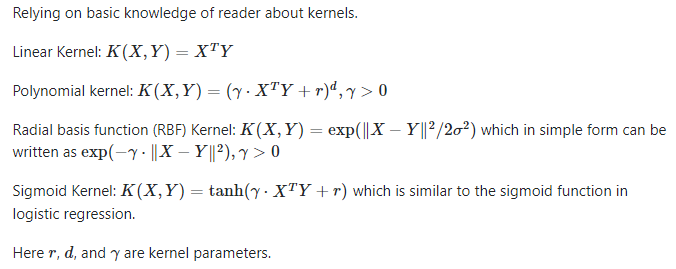

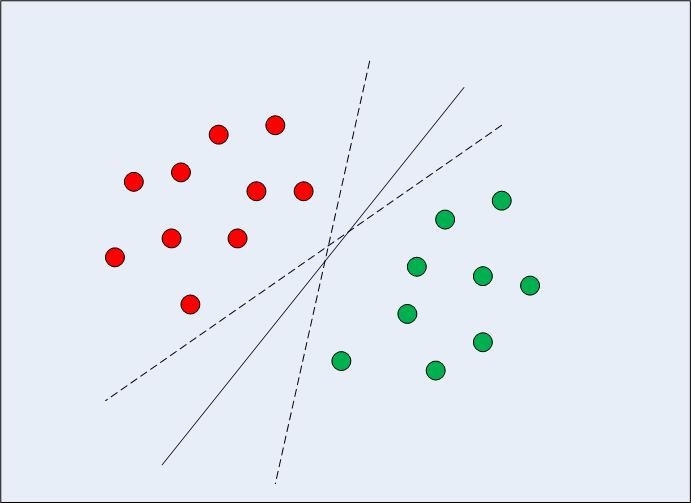